In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns       # Wrapper over matplotlib
import tensorflow as tf
from sklearn.linear_model import LinearRegression

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Source: Data Source :http://data.seoul.go.kr/ SOUTH KOREA PUBLIC HOLIDAYS. URL: publicholidays.go.kr

In [5]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
df = pd.read_csv("SeoulBikeData.csv", encoding="ISO-8859-1").drop(["Date", "Holiday", "Seasons"], axis=1)

In [6]:
df.columns = dataset_cols
df["functional"] = (df["functional"] == "Yes").astype(int)
df = df[df["hour"] == 12]
df = df.drop("hour", axis=1)

In [7]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


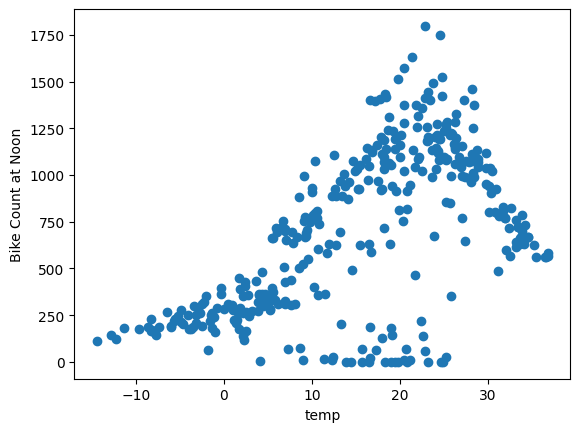

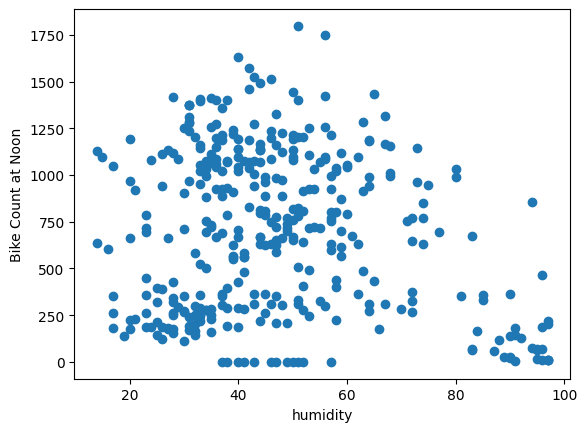

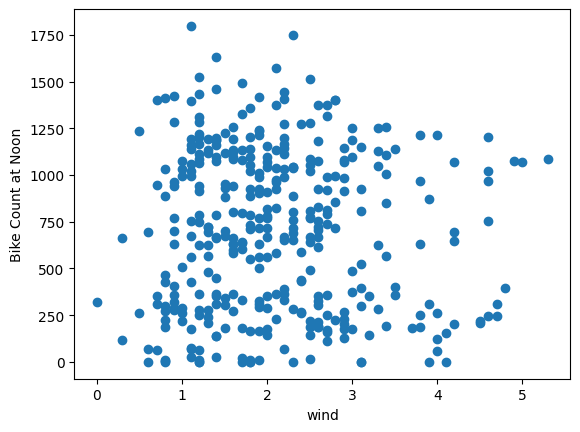

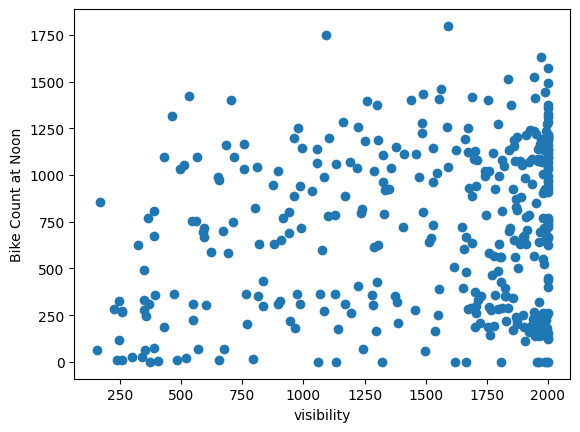

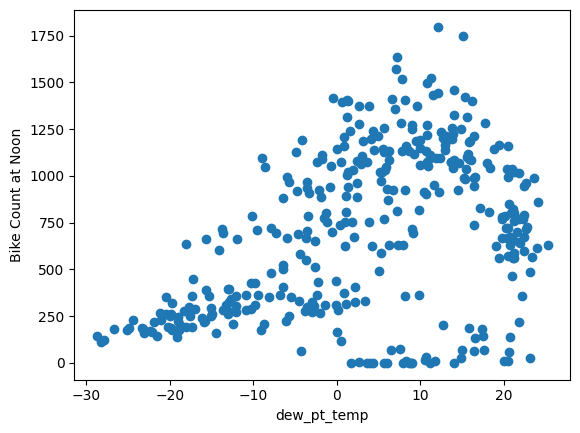

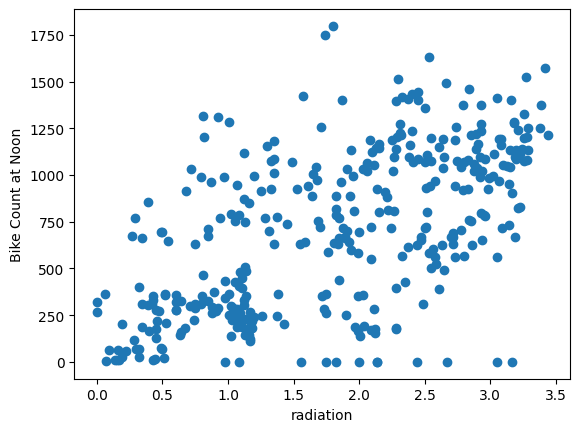

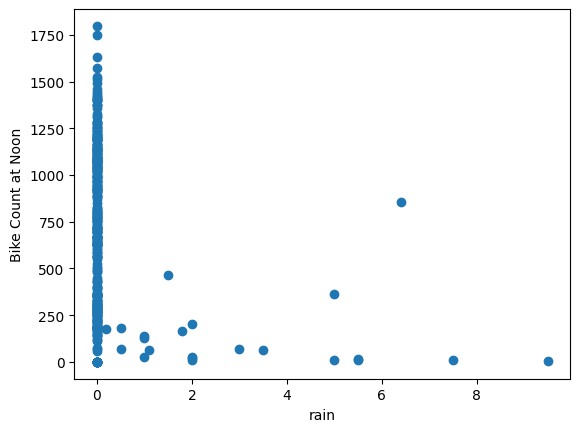

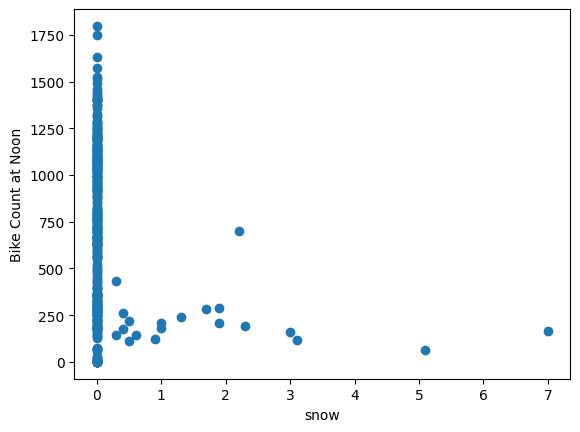

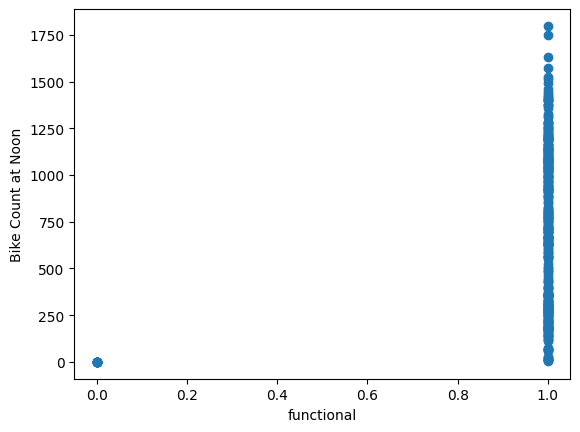

In [8]:
for label in df.columns[1:]:
    plt.scatter(df[label], df["bike_count"])
    plt.xlabel(label)
    plt.ylabel("Bike Count at Noon")
    plt.show()

In [9]:
df = df.drop(["wind", "visibility", "functional"], axis=1)

In [10]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


In [11]:
train, val, test = np.split(df.sample(frac=1), [int(0.6 * len(df)), int(0.8 * len(df))])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [12]:
def get_xy(dataframe, y_label, x_label=None):
    dataframe = copy.deepcopy(dataframe)
    if x_label is None:
        x = dataframe[[c for c in dataframe.columns if c != y_label]].values
    else:
        if len(x_label) == 1:
            x = dataframe[x_label[0]].values.reshape(-1, 1)
        else:
            x = dataframe[x_label].values
    
    y = dataframe[y_label].values.reshape(-1, 1)
    data = np.hstack([x, y])

    return data, x, y


In [13]:
_, x_train_temp, y_train_temp = get_xy(train, "bike_count", x_label=["temp"])
_, x_val_temp, y_val_temp = get_xy(val, "bike_count", x_label=["temp"])
_, x_test_temp, y_test_temp = get_xy(test, "bike_count", x_label=["temp"])

In [14]:
temp_reg = LinearRegression()
temp_reg.fit(x_train_temp, y_train_temp)

LinearRegression()

In [15]:
print("Intercept:", temp_reg.intercept_)
print("Coefficient:", temp_reg.coef_)
print("R^2:", temp_reg.score(x_test_temp, y_test_temp))

Intercept: [366.90567568]
Coefficient: [[19.70107312]]
R^2: 0.3943178104966434


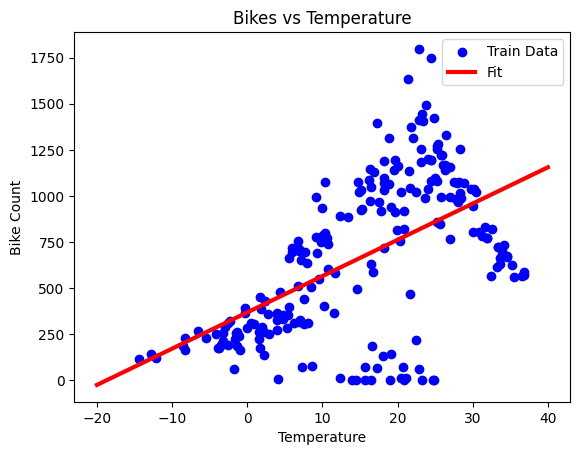

In [16]:
plt.scatter(x_train_temp, y_train_temp, label="Train Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.xlabel("Temperature")
plt.ylabel("Bike Count")
plt.title("Bikes vs Temperature")
plt.show()

#### Multiple Linear Regression

In [17]:
train, val, test = np.split(df.sample(frac=1), [int(0.6 * len(df)), int(0.8 * len(df))])
_, x_train_all, y_train_all = get_xy(train, "bike_count", x_label=df.columns[1:])
_, x_val_all, y_val_all = get_xy(val, "bike_count", x_label=df.columns[1:])
_, x_test_all, y_test_all = get_xy(test, "bike_count", x_label=df.columns[1:])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [18]:
all_reg = LinearRegression()
all_reg.fit(x_train_all, y_train_all)

LinearRegression()

In [19]:
all_reg.score(x_test_all, y_test_all)

0.5709503613839138

In [31]:
y_pred_lr = all_reg.predict(x_test_all)

#### Regression with Neural Network

In [32]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [35]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(x_train_temp.reshape(-1))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [38]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss="mean_squared_error")

In [39]:
history = temp_nn_model.fit(
    x_train_temp.reshape(-1), y_train_temp,
    epochs=1000,
    validation_data=(x_val_temp, y_val_temp),
    verbose=0)

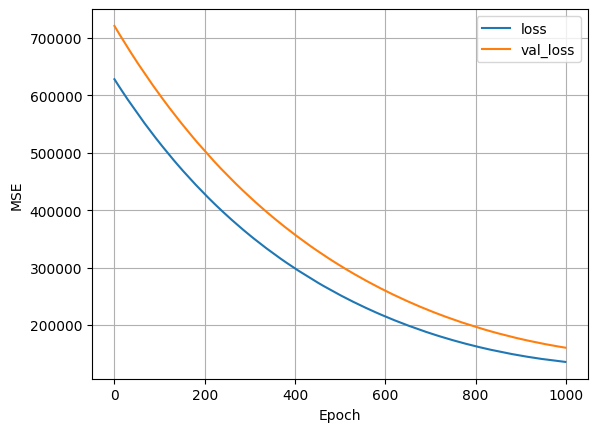

In [40]:
plot_loss(history)